In [1]:
## Overview 

In [1]:
### Import Libraries
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import decomposition
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import time
import sys
sys.path.insert(0,'../../../../../utils/')
from helper_functions_genus import *
#import helper_function custom library
from model_builder_genus import ModelBuilder
pd.options.mode.chained_assignment = None
%matplotlib inline 

In [2]:
### Import and Clean Data
#load spectra data
#import_spectra
spectra = pd.read_csv("../../../../../data/imp_bands.csv")
df_aug = pd.read_csv("../../../../../data/refCanopies0802_0630.txt")
df_sep = pd.read_csv("../../../../../data/refCanopies0917_0630.txt")
df_oct = pd.read_csv("../../../../../data/refCanopies1016_0630.txt")

#load tree data
df_tree = pd.read_csv("../../../../../data/Export_Output_2_0630_Genus.txt")

In [3]:
#select 22 bands only
cols = list(df_aug.columns[:8]) + ['450.41','652.35','540.72','848.93']
df_aug = df_aug[cols]
df_sep = df_sep[cols]
df_oct = df_oct[cols]
df_aug.head()

,ROIID,IDwithROI,X,Y,MapX,MapY,Lat,Lon,450.41,652.35,540.72,848.93
0,1,1,6558,1881,697516.92,4522326.17,40.828198,-96.657615,0.0180,0.0240,0.0271,0.1384
1,1,2,6559,1881,697517.52,4522326.17,40.828198,-96.657608,0.0186,0.0238,0.0257,0.1424
2,1,3,6560,1881,697518.12,4522326.17,40.828198,-96.657600,0.0188,0.0302,0.0346,0.2292
3,1,4,6561,1881,697518.72,4522326.17,40.828198,-96.657593,0.0188,0.0302,0.0346,0.2292
4,1,5,6562,1881,697519.32,4522326.17,40.828197,-96.657586,0.0204,0.0337,0.0377,0.2875


In [4]:
#holds evaluation metrics for species_hyper_ind
curr_evals = []

In [5]:
## August Image Models

In [6]:
### No Dimension Reduction

In [7]:
#clean and split data
mb_aug = ModelBuilder(df_aug,df_tree)
x_train,x_test,y_train,y_test = mb_aug.split_data()

data cleaning in progress ...

data cleaning completed.
   ROIID  IDwithROI  450.41  652.35  540.72  848.93 TARGET
0      1          1  0.0180  0.0240  0.0271  0.1384   Pine
1      1          2  0.0186  0.0238  0.0257  0.1424   Pine
2      1          3  0.0188  0.0302  0.0346  0.2292   Pine
3      1          4  0.0188  0.0302  0.0346  0.2292   Pine
4      1          5  0.0204  0.0337  0.0377  0.2875   Pine


In [8]:
#build random forest model with ntree = 100
model_aug = mb_aug.build_model(x_train, y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


model building completed.


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.2s finished


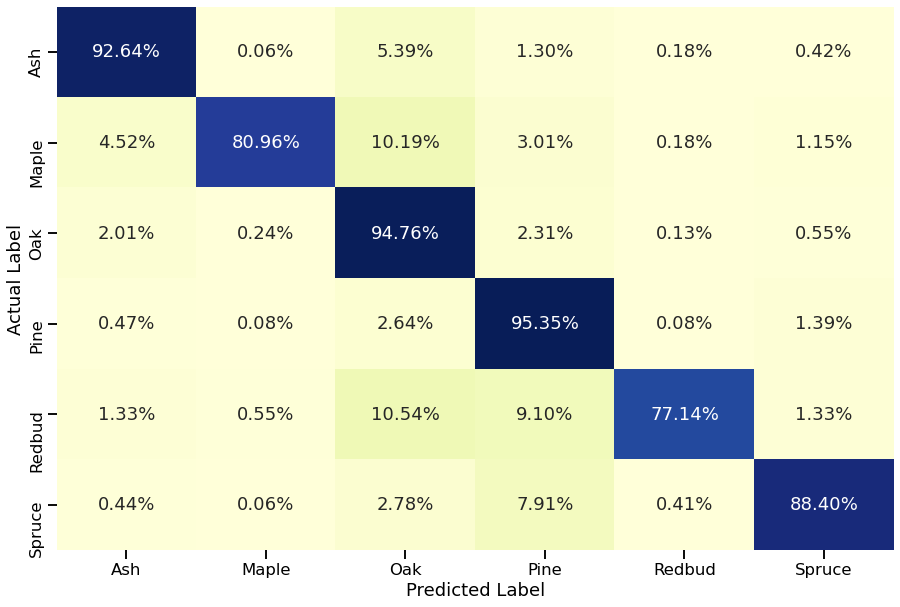

In [9]:
#evaluate the model
#create a confusion matrix
labels = ["Ash","Maple","Oak","Pine","Redbud","Spruce"]
nclasses = 6
model_name = 'genus_multi4_ind_nd_aug'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_aug,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [10]:
#save the model
save_model(model_aug,model_name)

In [11]:
## September Image Models

In [12]:
### No Dimension Reduction

In [13]:
#clean and split data
mb_sep = ModelBuilder(df_sep,df_tree)
x_train,x_test,y_train,y_test = mb_sep.split_data()

data cleaning in progress ...

data cleaning completed.
   ROIID  IDwithROI  450.41  652.35  540.72  848.93 TARGET
0      1          1  0.0184  0.0219  0.0258  0.1524   Pine
1      1          2  0.0184  0.0219  0.0258  0.1524   Pine
2      1          3  0.0194  0.0311  0.0317  0.1606   Pine
3      1          4  0.0194  0.0311  0.0317  0.1606   Pine
4      1          5  0.0242  0.0332  0.0385  0.2317   Pine


In [14]:
#build random forest model with ntree = 100
model_sep = mb_sep.build_model(x_train, y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


model building completed.


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.1s finished


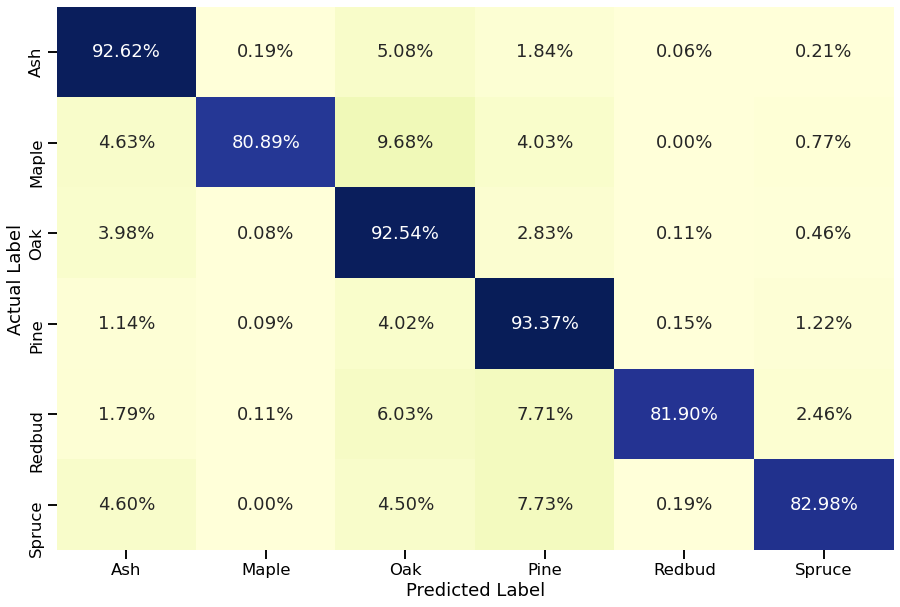

In [15]:
model_name = 'genus_multi4_ind_nd_sep'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_sep,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [16]:
#save the model
save_model(model_sep,model_name)

In [17]:
## October Image Models

In [18]:
### No Dimension Reduction

In [19]:
#clean and split data
mb_oct = ModelBuilder(df_oct,df_tree)
x_train,x_test,y_train,y_test = mb_oct.split_data()

data cleaning in progress ...

data cleaning completed.
   ROIID  IDwithROI  450.41  652.35  540.72  848.93 TARGET
0      1          1  0.0098  0.0156  0.0147  0.0839   Pine
1      1          2  0.0098  0.0156  0.0147  0.0839   Pine
2      1          3  0.0098  0.0163  0.0152  0.0956   Pine
3      1          4  0.0098  0.0163  0.0152  0.0956   Pine
4      1          5  0.0089  0.0165  0.0181  0.1258   Pine


In [20]:
#build random forest model with ntree = 100
model_oct = mb_oct.build_model(x_train, y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


model building completed.


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.2s finished


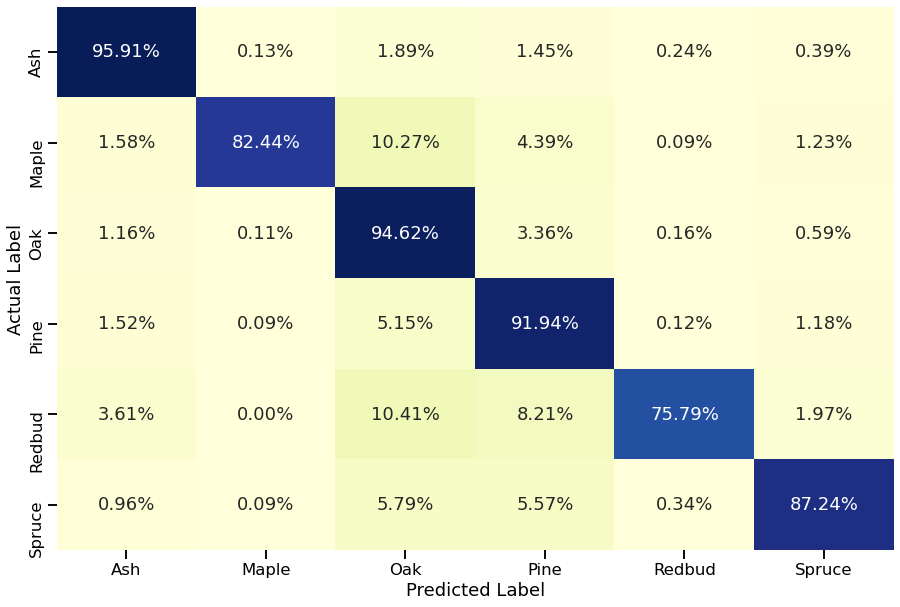

In [21]:
#evaluate the model
model_name = 'genus_multi4_ind_nd_oct'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_oct,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [22]:
#save the model
save_model(model_oct,model_name)

In [23]:
#concatenate all current results into one dataframe
df_curr_evals = pd.concat(curr_evals)
#save the current results
df_curr_evals.to_csv('genus_multi4_ind_summary_results.csv')


In [24]:
df_curr_evals

,Model,Train Accuracy(%),Test Accuracy(%)
0,genus_multi4_ind_nd_aug,99.909423,92.936997
0,genus_multi4_ind_nd_sep,98.650969,91.157991
0,genus_multi4_ind_nd_oct,99.781586,92.455864
